In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import string

warnings.filterwarnings('ignore')

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'HCR Dotum'#'NanumGothic'


import json
#import folium
#from folium import plugins
#
#geo_path = 'data/seoul_municipalities_geo_simple.json'
#geo_str = json.load(open(geo_path, encoding='utf-8'))

# 분석할 년도 입력

In [14]:
year=input('분석할 년도를 입력하세요 : ')

분석할 년도를 입력하세요 : 2019


# 대여이력 정보

## - 대여이력 파일들의 이름 가져오기

In [15]:
import os
path = "년월별/"

## - 월별 변수 자동 생성 및 대여이력 정보 가져오기 -> month_1, month_2, ..., month_12

In [16]:
month_ea=12
for i in range(1, month_ea+1):
    globals()['month_{}'.format(i)]=pd.read_csv(path+'{}_{}.csv'.format(year,i), encoding='cp949')

### 요일별 이용량

## - 월별

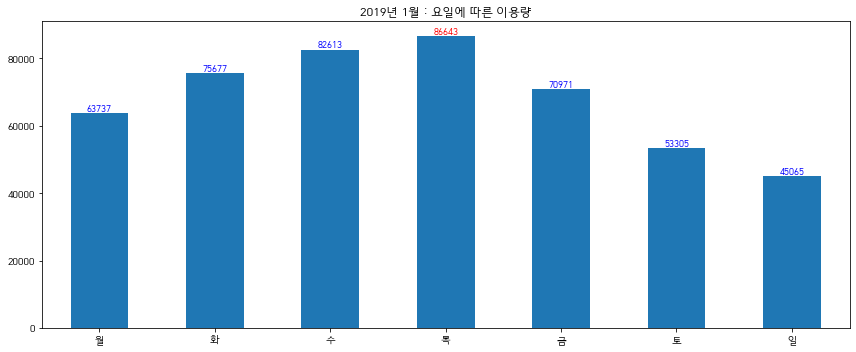

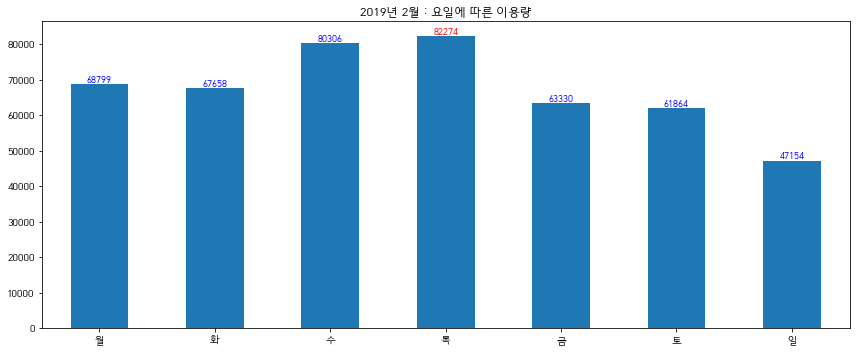

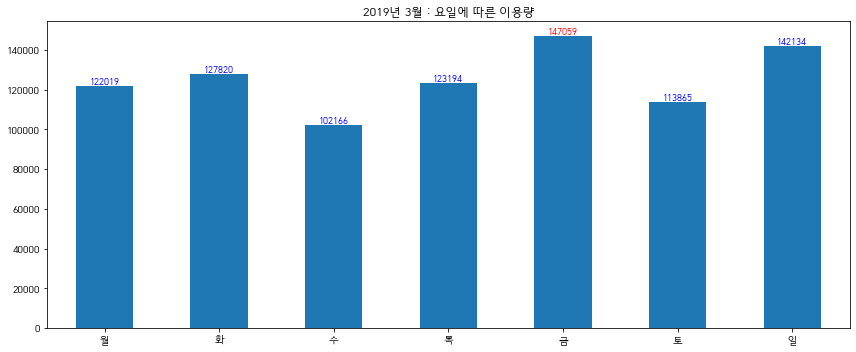

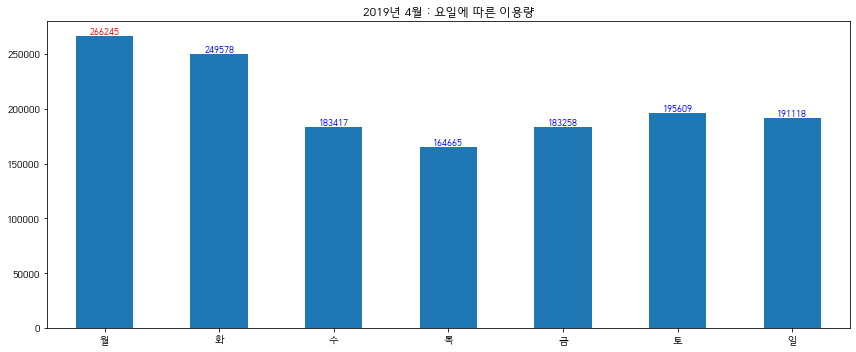

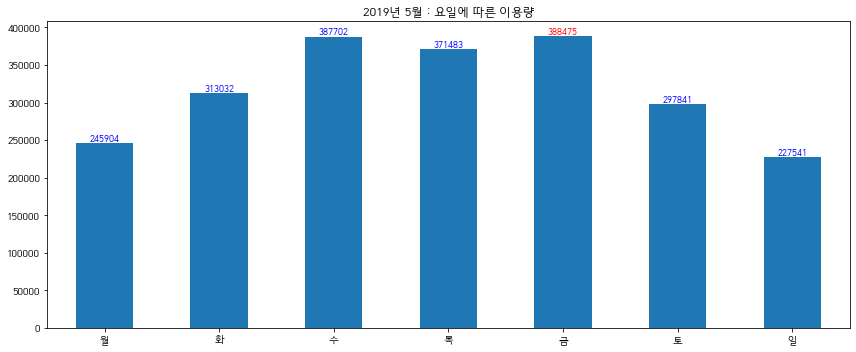

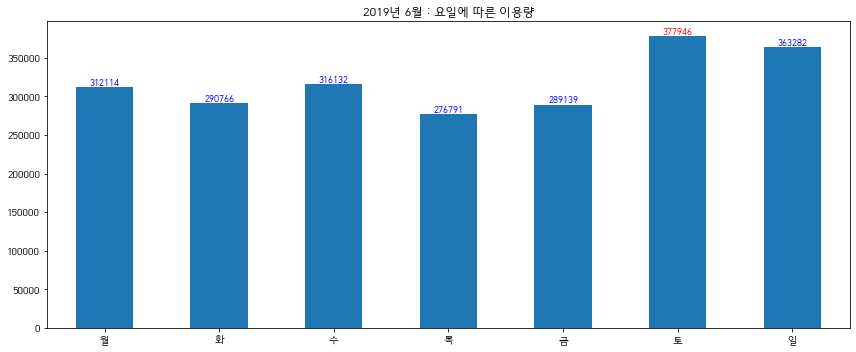

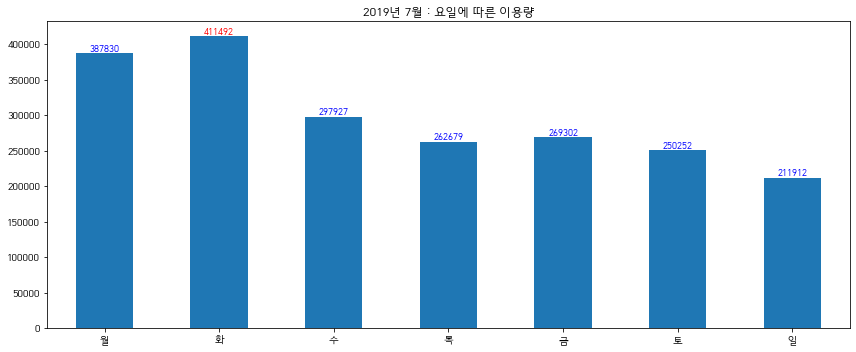

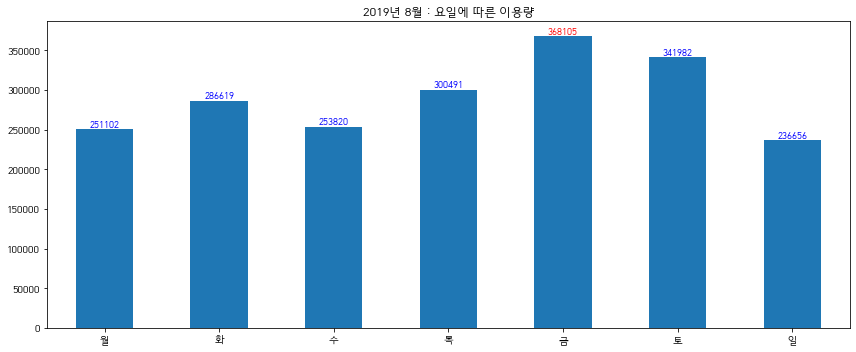

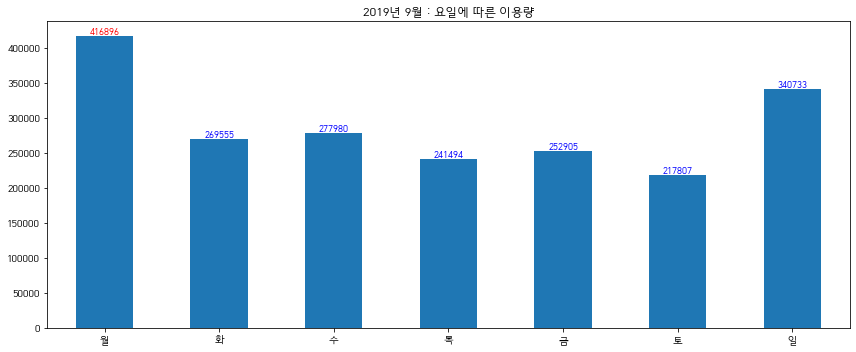

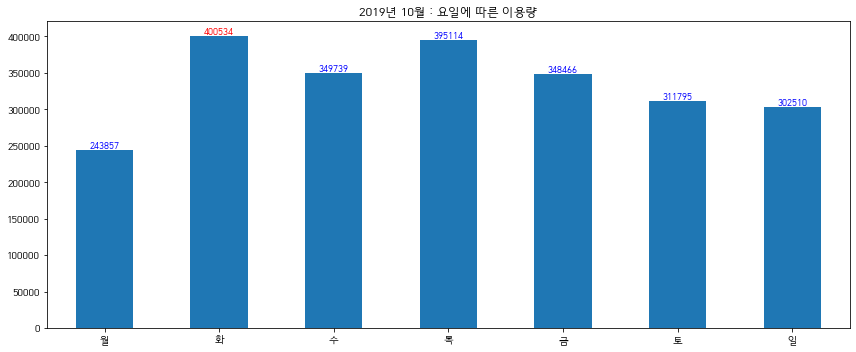

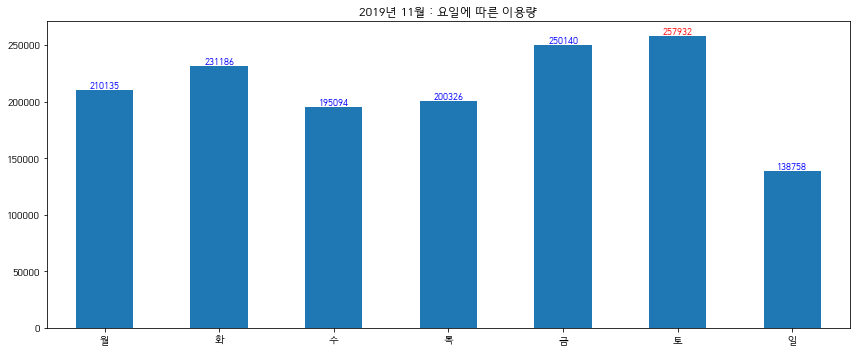

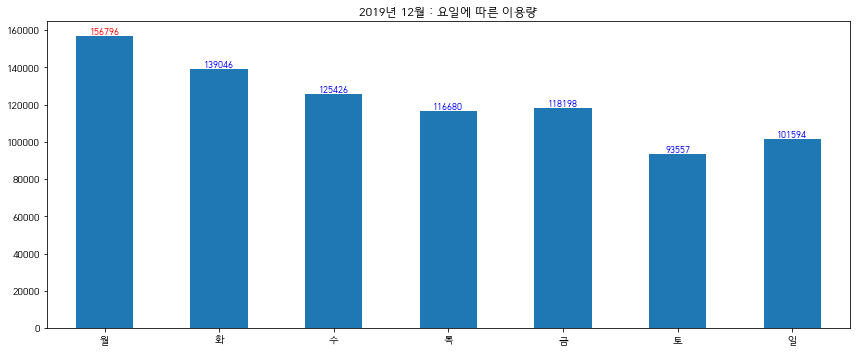

In [17]:
#total_x와 total_y는 해당 년에 대한 통계를 위해 사용
total_x=["월","화","수","목","금","토","일"]
total_y=[0,0,0,0,0,0,0]
for i in range(1, month_ea+1):
    globals()['use_by_dayofweek_{}'.format(i)]=globals()['month_{}'.format(i)].groupby('대여요일').size()
    globals()['use_by_dayofweek_{}'.format(i)].index = "월 화 수 목 금 토 일".split()
    globals()['use_by_dayofweek_{}'.format(i)].plot(kind='bar', figsize=(12, 5), rot=0, title="{}년 {}월 : 요일에 따른 이용량".format(year,i))
    for j in range(0,7):
        total_y[j]=total_y[j]+globals()['use_by_dayofweek_{}'.format(i)][j]
        
        if max(globals()['use_by_dayofweek_{}'.format(i)])==globals()['use_by_dayofweek_{}'.format(i)][j]:
            COLOR='red'
        else :
            COLOR='blue'
        plt.text(j,globals()['use_by_dayofweek_{}'.format(i)][j],
                 globals()['use_by_dayofweek_{}'.format(i)][j],
                 fontsize = 9, color=COLOR,
                 horizontalalignment='center',  # horizontalalignment (left, center, right)
                 verticalalignment='bottom')    # verticalalignment (top, center, bottom
        
    plt.savefig("요일별_분석/요일에 따른 이용량/{}_{}.png".format(year,i), facecolor='w') #png 파일 생성
    
    plt.tight_layout()
    plt.show()

## - 해당 년에 대한 통계

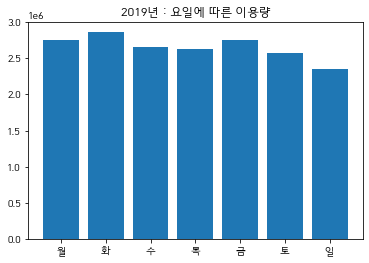

<Figure size 864x360 with 0 Axes>

2019년 총 대여건수 : 18554113
2019년 월요일 : 2745434
2019년 화요일 : 2862963
2019년 수요일 : 2652322
2019년 목요일 : 2621834
2019년 금요일 : 2749348
2019년 토요일 : 2573755
2019년 일요일 : 2348457
--------------------------
대여 많은 순
화, 금, 월, 수, 목, 토, 일


In [18]:
plt.bar(total_x,total_y)
plt.title("{}년 : 요일에 따른 이용량".format(year))
plt.figure(figsize=(12,5))

plt.tight_layout()

plt.savefig("요일별_분석/요일에 따른 이용량/{}년에 대한 통계.png".format(year), facecolor='w') #png 파일 생성

plt.show()

print('{}년 총 대여건수 : {}'.format(year,sum(total_y)))
for i in range(0,7):
    print('{}년 {}요일 : {}'.format(year,total_x[i],total_y[i]))
print('--------------------------')
print('대여 많은 순')

#대여 많은 순으로 정렬
total_dict=dict(zip(total_x,total_y))
total_dict=sorted(total_dict.items(),reverse=True,key = lambda item: item[1])
for i in range(0,7):
    if i==6:
        print(total_dict[i][0])
    else:
        print(total_dict[i][0], end=', ')

# 평일과 주말 이용량

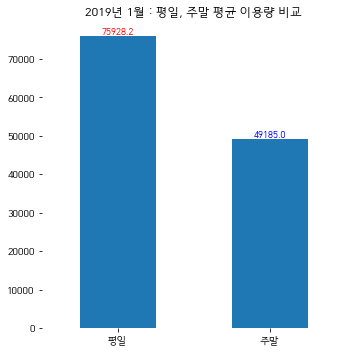

2019년 1월 : 평일이 주말대비 35.2% 더 많다.


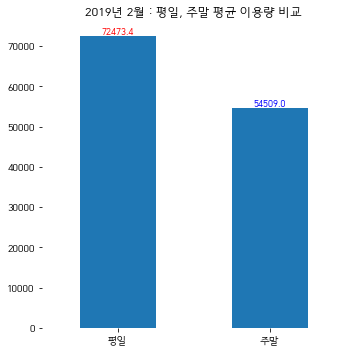

2019년 2월 : 평일이 주말대비 24.8% 더 많다.


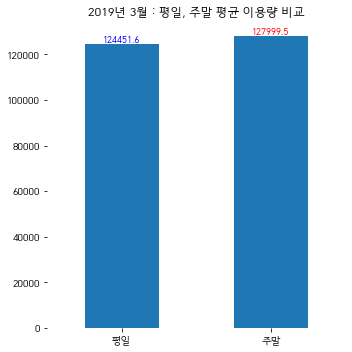

2019년 3월 : 주말이 평일대비 2.9% 더 많다.


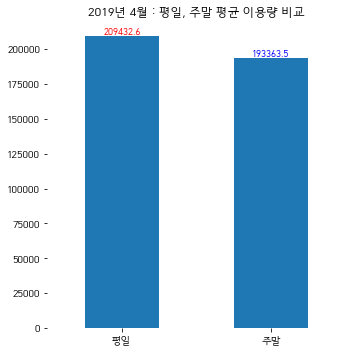

2019년 4월 : 평일이 주말대비 7.7% 더 많다.


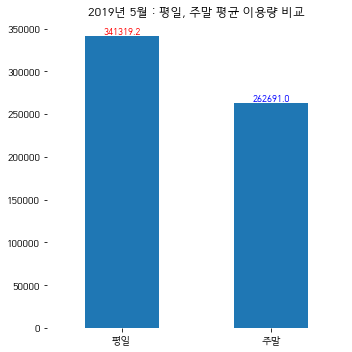

2019년 5월 : 평일이 주말대비 23.0% 더 많다.


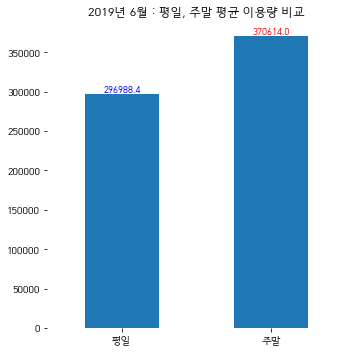

2019년 6월 : 주말이 평일대비 24.8% 더 많다.


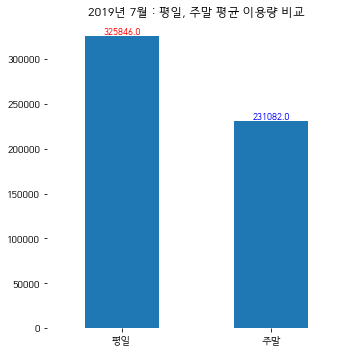

2019년 7월 : 평일이 주말대비 29.1% 더 많다.


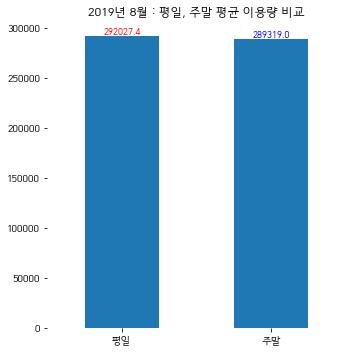

2019년 8월 : 평일이 주말대비 0.9% 더 많다.


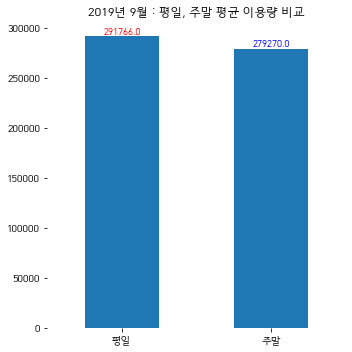

2019년 9월 : 평일이 주말대비 4.3% 더 많다.


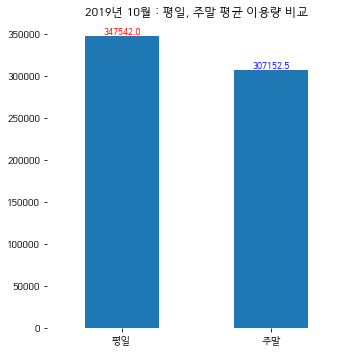

2019년 10월 : 평일이 주말대비 11.6% 더 많다.


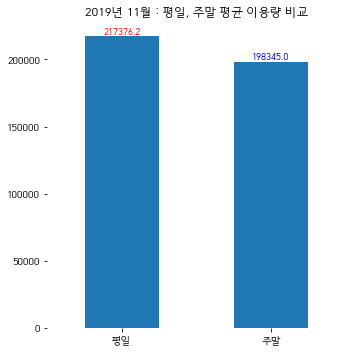

2019년 11월 : 평일이 주말대비 8.8% 더 많다.


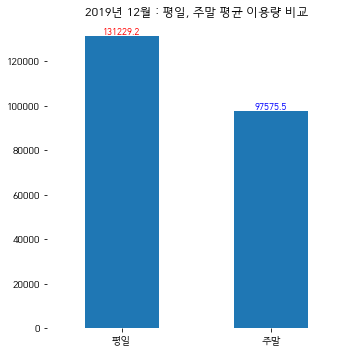

2019년 12월 : 평일이 주말대비 25.6% 더 많다.


In [19]:
for i in range(1, month_ea+1):
    globals()['mean_weekday_{}'.format(i)] = globals()['use_by_dayofweek_{}'.format(i)].loc["월 화 수 목 금".split()].mean()
    globals()['mean_weekend_{}'.format(i)] = globals()['use_by_dayofweek_{}'.format(i)].loc["토 일".split()].mean()
    pd.Series(data=[globals()['mean_weekday_{}'.format(i)],globals()['mean_weekend_{}'.format(i)]],
              index=["평일", "주말"]).plot(kind='bar', figsize=(5, 5), rot=0, title="{}년 {}월 : 평일, 주말 평균 이용량 비교".format(year,i))
    diff=(globals()['mean_weekday_{}'.format(i)]-globals()['mean_weekend_{}'.format(i)])/globals()['mean_weekday_{}'.format(i)]*100
    txt='{}년 {}월 : '.format(year, i)
    if diff>0:
        txt+="평일이 주말대비 %.1f%% 더 많다."%diff
        COLOR_weekday='red'
        COLOR_weekend='blue'
    elif diff<0:
        txt+="주말이 평일대비 %.1f%% 더 많다."%(diff*(-1))
        COLOR_weekday='blue'
        COLOR_weekend='red'
    else :
        txt+="평일과 주말의 이용량이 같다."
        COLOR_weekday='blue'
        COLOR_weekend='blue'
    plt.text(0,globals()['mean_weekday_{}'.format(i)],
             globals()['mean_weekday_{}'.format(i)],
             fontsize = 9, color=COLOR_weekday,
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom
    plt.text(1,globals()['mean_weekend_{}'.format(i)],
             globals()['mean_weekend_{}'.format(i)],
             fontsize = 9, color=COLOR_weekend,
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom
    
    plt.savefig("요일별_분석/평일주말이용량/{}_{}.png".format(year,i), facecolor='w') #png 파일 생성
    
    plt.box(False)
    plt.tight_layout()
    plt.show()
       
    print(txt)